# desulphurisation - predictor

In [1]:
import pandas as pd

In [2]:
sulphur = pd.read_csv("ordata.csv")

In [3]:
sulphur.head()

,CASTNO,HM_WT,AIM_S,HM_S,HM_C,HM_SI,HM_TI,HM_MN,CAC2,MG,HM_TEMP,CAC2_INJ_TIME,MG_INJ_TIME,DS_S
0,V99790,171,0.005,0.040,4.572,0.518,0.069,0.040,347,49,1387.0,10,4,0.009
1,V99791,161,0.005,0.035,4.580,0.559,0.070,0.041,361,45,1386.0,10,4,0.007
2,V99789,170,0.005,0.042,4.590,0.468,0.044,0.036,355,52,1368.0,9,4,0.013
3,V99787,159,0.005,0.034,4.530,0.737,0.077,0.040,313,44,1401.0,9,4,0.010
4,V99782,162,0.005,0.042,4.560,0.443,0.056,0.037,360,55,1346.0,10,5,0.013


In [4]:
sulphur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6697 entries, 0 to 6696
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CASTNO         6697 non-null   object 
 1   HM_WT          6697 non-null   int64  
 2   AIM_S          6697 non-null   float64
 3   HM_S           6697 non-null   float64
 4   HM_C           6697 non-null   float64
 5   HM_SI          6697 non-null   float64
 6   HM_TI          6697 non-null   float64
 7   HM_MN          6697 non-null   float64
 8   CAC2           6697 non-null   int64  
 9   MG             6697 non-null   int64  
 10  HM_TEMP        6094 non-null   float64
 11  CAC2_INJ_TIME  6697 non-null   int64  
 12  MG_INJ_TIME    6697 non-null   int64  
 13  DS_S           6697 non-null   float64
dtypes: float64(8), int64(5), object(1)
memory usage: 732.6+ KB


In [5]:
sulphur['AIM_S']

0       0.005
1       0.005
2       0.005
3       0.005
4       0.005
        ...  
6692    0.005
6693    0.005
6694    0.005
6695    0.005
6696    0.005
Name: AIM_S, Length: 6697, dtype: float64

In [6]:
sulphur['AIM_S'].value_counts()

0.005    5604
0.003     717
0.008     328
0.010      46
0.012       2
Name: AIM_S, dtype: int64

In [7]:
sulphur.describe()

,HM_WT,AIM_S,HM_S,HM_C,HM_SI,HM_TI,HM_MN,CAC2,MG,HM_TEMP,CAC2_INJ_TIME,MG_INJ_TIME,DS_S
count,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6094.000000,6697.000000,6697.000000,6697.000000
mean,165.411229,0.004969,0.039572,4.562660,0.612587,0.066564,0.042735,354.522771,50.390623,1388.349688,9.372555,4.919068,0.007524
std,6.315830,0.001027,0.009874,0.053558,0.166054,0.014707,0.004797,59.711921,9.244264,37.644318,1.708239,1.196379,0.002783
min,140.000000,0.003000,0.011000,4.120000,0.186000,0.020000,0.013000,209.000000,0.000000,1226.000000,5.000000,0.000000,0.001000
25%,161.000000,0.005000,0.033000,4.540000,0.496000,0.057000,0.040000,318.000000,45.000000,1366.000000,8.000000,4.000000,0.005000
50%,165.000000,0.005000,0.038000,4.560000,0.586000,0.066000,0.042000,345.000000,49.000000,1389.000000,9.000000,5.000000,0.007000
75%,170.000000,0.005000,0.045000,4.590000,0.706000,0.075000,0.046000,380.000000,55.000000,1411.000000,10.000000,5.000000,0.009000
max,180.000000,0.012000,0.095000,4.770000,1.644000,0.145000,0.085000,1283.000000,198.000000,1574.000000,25.000000,15.000000,0.024000


In [8]:
%matplotlib inline 

In [9]:
#for plotting histogram
#import matplotlib.pyplot as plt
#sulphur.hist(bins=50, figsize =(20, 15))

# Train-test Splitting

In [10]:
#for practice purpose
import numpy  as np
np.random.seed(42)
def split_train_test(data,test_ratio):
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data)* test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]
    
                

In [11]:
train_set , test_set = split_train_test(sulphur ,0.2)

[1881 2627  496 ... 5226 5390  860]


In [12]:
print(f"Rows in train set: {len(train_set)}\nRows in test set :{len(test_set)}\n")

Rows in train set: 5358
Rows in test set :1339



In [13]:
#train_set, test_set = split_train_test(sulphur, 0.2)

In [14]:
#test_set.info()

In [15]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(sulphur,test_size=0.2 , random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set :{len(test_set)}\n")

Rows in train set: 5357
Rows in test set :1340



In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2 , random_state=42 )
for train_index , test_index in split.split(sulphur , sulphur['AIM_S']):
    strat_train_set = sulphur.loc[train_index]
    strat_test_set = sulphur.loc[test_index]

In [17]:
strat_test_set

,CASTNO,HM_WT,AIM_S,HM_S,HM_C,HM_SI,HM_TI,HM_MN,CAC2,MG,HM_TEMP,CAC2_INJ_TIME,MG_INJ_TIME,DS_S
2646,V96389,168,0.005,0.050,4.53,0.722,0.071,0.046,398,55,1374.0,10,5,0.004
5143,V93030,158,0.003,0.029,4.59,0.916,0.104,0.060,320,45,1413.0,9,4,0.003
4074,V94411,159,0.005,0.058,4.48,0.490,0.038,0.039,430,62,NaN,12,7,0.010
944,V98529,173,0.005,0.045,4.54,0.430,0.055,0.037,370,56,1379.0,10,5,0.011
3055,V95844,174,0.005,0.034,4.55,0.552,0.063,0.048,320,56,1430.0,9,5,0.007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3588,V95096,171,0.005,0.038,4.61,0.530,0.055,0.042,335,47,1404.0,8,5,0.011
941,V98532,166,0.005,0.045,4.53,0.800,0.078,0.038,368,57,1383.0,10,5,0.006
3914,V94663,162,0.003,0.026,4.55,0.860,0.080,0.055,326,41,1415.0,8,4,0.006
3207,V95657,164,0.005,0.027,4.56,0.769,0.076,0.048,279,39,NaN,7,4,0.008


In [18]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 2646 to 4601
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CASTNO         1340 non-null   object 
 1   HM_WT          1340 non-null   int64  
 2   AIM_S          1340 non-null   float64
 3   HM_S           1340 non-null   float64
 4   HM_C           1340 non-null   float64
 5   HM_SI          1340 non-null   float64
 6   HM_TI          1340 non-null   float64
 7   HM_MN          1340 non-null   float64
 8   CAC2           1340 non-null   int64  
 9   MG             1340 non-null   int64  
 10  HM_TEMP        1218 non-null   float64
 11  CAC2_INJ_TIME  1340 non-null   int64  
 12  MG_INJ_TIME    1340 non-null   int64  
 13  DS_S           1340 non-null   float64
dtypes: float64(8), int64(5), object(1)
memory usage: 157.0+ KB


In [19]:
strat_test_set.describe()

,HM_WT,AIM_S,HM_S,HM_C,HM_SI,HM_TI,HM_MN,CAC2,MG,HM_TEMP,CAC2_INJ_TIME,MG_INJ_TIME,DS_S
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1218.000000,1340.000000,1340.000000,1340.000000
mean,165.565672,0.004966,0.039499,4.563784,0.615249,0.066666,0.042743,354.250000,50.460448,1387.082923,9.370149,4.969403,0.007519
std,6.463618,0.001020,0.010218,0.052735,0.169449,0.014634,0.004927,58.292823,9.194151,37.499763,1.724143,1.248074,0.002798
min,142.000000,0.003000,0.015000,4.250000,0.244000,0.025000,0.028000,231.000000,0.000000,1245.000000,6.000000,0.000000,0.002000
25%,161.000000,0.005000,0.032000,4.540000,0.496750,0.057000,0.039000,315.000000,45.000000,1365.000000,8.000000,4.000000,0.005000
50%,165.000000,0.005000,0.038000,4.560000,0.584500,0.066000,0.042500,346.000000,49.000000,1388.000000,9.000000,5.000000,0.007000
75%,170.000000,0.005000,0.045000,4.590000,0.709250,0.076000,0.046000,382.000000,55.000000,1409.000000,10.000000,6.000000,0.009000
max,180.000000,0.010000,0.080000,4.740000,1.440000,0.128000,0.066000,862.000000,114.000000,1570.000000,20.000000,11.000000,0.023000


In [20]:
strat_test_set['AIM_S'].value_counts()

0.005    1121
0.003     144
0.008      66
0.010       9
Name: AIM_S, dtype: int64

In [21]:
#1121/144

In [22]:
strat_train_set['AIM_S'].value_counts()

0.005    4483
0.003     573
0.008     262
0.010      37
0.012       2
Name: AIM_S, dtype: int64

In [23]:
#4483/573

In [24]:
sulphur = strat_train_set.copy()

# Looking for correlation

In [25]:
corr_matrix = sulphur.corr()

In [26]:
corr_matrix['DS_S'].sort_values(ascending=False)

DS_S             1.000000
HM_S             0.410647
CAC2             0.227120
MG_INJ_TIME      0.175662
CAC2_INJ_TIME    0.173321
AIM_S            0.150576
MG               0.123454
HM_WT            0.031911
HM_TEMP          0.007677
HM_C            -0.129763
HM_MN           -0.227188
HM_SI           -0.403902
HM_TI           -0.516448
Name: DS_S, dtype: float64

In [27]:
corr_matrix['AIM_S'].sort_values(ascending=False)

AIM_S            1.000000
DS_S             0.150576
HM_SI            0.026899
HM_C             0.022975
HM_TI            0.018681
HM_S             0.016785
HM_WT            0.004451
HM_MN           -0.017448
HM_TEMP         -0.040227
CAC2_INJ_TIME   -0.107328
CAC2            -0.108079
MG              -0.146858
MG_INJ_TIME     -0.162647
Name: AIM_S, dtype: float64

In [28]:
corr_matrix['HM_S'].sort_values(ascending=False)

HM_S             1.000000
CAC2             0.754153
CAC2_INJ_TIME    0.746863
MG               0.690435
MG_INJ_TIME      0.579528
DS_S             0.410647
HM_WT            0.040230
AIM_S            0.016785
HM_TEMP         -0.151821
HM_C            -0.387242
HM_SI           -0.446034
HM_MN           -0.469423
HM_TI           -0.622728
Name: HM_S, dtype: float64

array([[<AxesSubplot:xlabel='DS_S', ylabel='DS_S'>,
        <AxesSubplot:xlabel='HM_S', ylabel='DS_S'>,
        <AxesSubplot:xlabel='AIM_S', ylabel='DS_S'>],
       [<AxesSubplot:xlabel='DS_S', ylabel='HM_S'>,
        <AxesSubplot:xlabel='HM_S', ylabel='HM_S'>,
        <AxesSubplot:xlabel='AIM_S', ylabel='HM_S'>],
       [<AxesSubplot:xlabel='DS_S', ylabel='AIM_S'>,
        <AxesSubplot:xlabel='HM_S', ylabel='AIM_S'>,
        <AxesSubplot:xlabel='AIM_S', ylabel='AIM_S'>]], dtype=object)

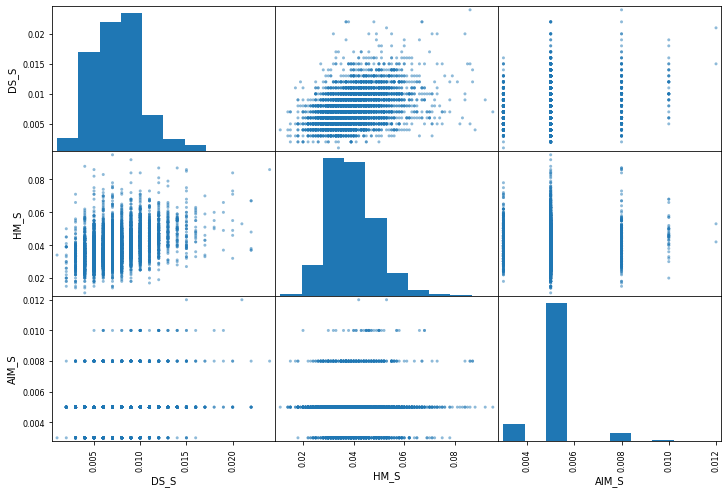

In [29]:
from pandas.plotting import scatter_matrix
attributes = ["DS_S","HM_S","AIM_S"]
scatter_matrix(sulphur[attributes],figsize=(12,8))

<AxesSubplot:xlabel='AIM_S', ylabel='DS_S'>

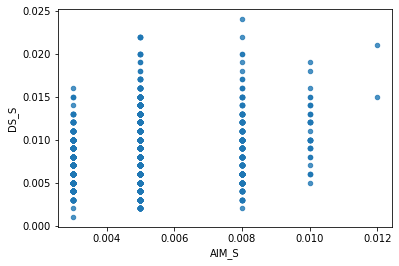

In [30]:
sulphur.plot(kind="scatter", x = "AIM_S" , y = "DS_S",alpha = 0.8)

# combining attribute only for learning

In [31]:
#sulphur["AIM_SDS_S"]=sulphur['AIM_S']+sulphur['DS_S']

In [32]:
#sulphur["AIM_SDS_S"]

In [33]:
#sulphur.head()

# correlations

In [34]:
corr_matrix = sulphur.corr()
corr_matrix['AIM_S'].sort_values(ascending=False)

AIM_S            1.000000
DS_S             0.150576
HM_SI            0.026899
HM_C             0.022975
HM_TI            0.018681
HM_S             0.016785
HM_WT            0.004451
HM_MN           -0.017448
HM_TEMP         -0.040227
CAC2_INJ_TIME   -0.107328
CAC2            -0.108079
MG              -0.146858
MG_INJ_TIME     -0.162647
Name: AIM_S, dtype: float64

In [35]:
#sulphur.plot(kind="scatter", x = "AIM_SDS_S" , y = "DS_S",alpha = 0.8)

In [36]:
sulphur.head()

,CASTNO,HM_WT,AIM_S,HM_S,HM_C,HM_SI,HM_TI,HM_MN,CAC2,MG,HM_TEMP,CAC2_INJ_TIME,MG_INJ_TIME,DS_S
6578,V91093,173,0.005,0.038,4.61,0.437,0.058,0.052,334,51,1332.0,9,6,0.008
5758,V92278,156,0.005,0.026,4.60,0.640,0.077,0.046,284,38,1397.0,7,4,0.007
2549,V96507,154,0.003,0.024,4.56,0.817,0.083,0.047,301,47,1365.0,8,5,0.005
5230,V92927,166,0.005,0.027,4.63,0.829,0.091,0.045,293,43,1386.0,8,5,0.006
2147,V97019,175,0.005,0.038,4.58,0.581,0.074,0.041,341,49,1393.0,9,4,0.006


In [37]:
sulphur = strat_train_set.drop("DS_S",axis=1)
sulphur_labels = strat_train_set["DS_S"].copy()
sulphur.describe()

,HM_WT,AIM_S,HM_S,HM_C,HM_SI,HM_TI,HM_MN,CAC2,MG,HM_TEMP,CAC2_INJ_TIME,MG_INJ_TIME
count,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,4876.000000,5357.000000,5357.000000
mean,165.372597,0.004970,0.039591,4.562378,0.611921,0.066539,0.042732,354.591002,50.373157,1388.666120,9.373157,4.906478
std,6.278338,0.001029,0.009786,0.053763,0.165204,0.014726,0.004765,60.066805,9.257529,37.677526,1.704399,1.182880
min,140.000000,0.003000,0.011000,4.120000,0.186000,0.020000,0.013000,209.000000,0.000000,1226.000000,5.000000,0.000000
25%,161.000000,0.005000,0.033000,4.540000,0.495000,0.057000,0.040000,319.000000,45.000000,1366.000000,8.000000,4.000000
50%,165.000000,0.005000,0.038000,4.560000,0.587000,0.066000,0.042000,345.000000,49.000000,1389.000000,9.000000,5.000000
75%,170.000000,0.005000,0.045000,4.590000,0.705000,0.075000,0.046000,380.000000,55.000000,1411.000000,10.000000,5.000000
max,180.000000,0.012000,0.095000,4.770000,1.644000,0.145000,0.085000,1283.000000,198.000000,1574.000000,25.000000,15.000000


# missing attribute

1. get rid of whole attribute
2. get rid of missing data points
3. get thevalue  value to 0  mean or median

In [38]:
a=sulphur.dropna(subset=["HM_TEMP"])#option 1
a.shape
#orignal data frame will remain unchange

(4876, 13)

In [39]:
sulphur.drop("HM_TEMP",axis =1)# option 2
sulphur.shape
#orignal data frame will remain unchange

(5357, 13)

In [40]:
median = sulphur["HM_TEMP"].median()

In [41]:
sulphur["HM_TEMP"]

6578    1332.0
5758    1397.0
2549    1365.0
5230    1386.0
2147    1393.0
         ...  
264     1376.0
455     1367.0
318     1422.0
5550    1356.0
5479    1373.0
Name: HM_TEMP, Length: 5357, dtype: float64

In [42]:
sulphur.shape

(5357, 13)

In [43]:
sulphur.describe() #before we started filling missing aattribute

,HM_WT,AIM_S,HM_S,HM_C,HM_SI,HM_TI,HM_MN,CAC2,MG,HM_TEMP,CAC2_INJ_TIME,MG_INJ_TIME
count,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,4876.000000,5357.000000,5357.000000
mean,165.372597,0.004970,0.039591,4.562378,0.611921,0.066539,0.042732,354.591002,50.373157,1388.666120,9.373157,4.906478
std,6.278338,0.001029,0.009786,0.053763,0.165204,0.014726,0.004765,60.066805,9.257529,37.677526,1.704399,1.182880
min,140.000000,0.003000,0.011000,4.120000,0.186000,0.020000,0.013000,209.000000,0.000000,1226.000000,5.000000,0.000000
25%,161.000000,0.005000,0.033000,4.540000,0.495000,0.057000,0.040000,319.000000,45.000000,1366.000000,8.000000,4.000000
50%,165.000000,0.005000,0.038000,4.560000,0.587000,0.066000,0.042000,345.000000,49.000000,1389.000000,9.000000,5.000000
75%,170.000000,0.005000,0.045000,4.590000,0.705000,0.075000,0.046000,380.000000,55.000000,1411.000000,10.000000,5.000000
max,180.000000,0.012000,0.095000,4.770000,1.644000,0.145000,0.085000,1283.000000,198.000000,1574.000000,25.000000,15.000000


In [44]:
sulphur=sulphur.drop('CASTNO',axis=1)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")
imputer.fit(sulphur)

SimpleImputer(strategy='median')

In [45]:
imputer.statistics_

array([1.650e+02, 5.000e-03, 3.800e-02, 4.560e+00, 5.870e-01, 6.600e-02,
       4.200e-02, 3.450e+02, 4.900e+01, 1.389e+03, 9.000e+00, 5.000e+00])

In [46]:
imputer.statistics_.shape

(12,)

In [47]:
X = imputer.transform(sulphur)

In [48]:
sulphur_tr = pd.DataFrame(X, columns=sulphur.columns)

In [49]:
sulphur_tr.describe()

,HM_WT,AIM_S,HM_S,HM_C,HM_SI,HM_TI,HM_MN,CAC2,MG,HM_TEMP,CAC2_INJ_TIME,MG_INJ_TIME
count,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000
mean,165.372597,0.004970,0.039591,4.562378,0.611921,0.066539,0.042732,354.591002,50.373157,1388.696099,9.373157,4.906478
std,6.278338,0.001029,0.009786,0.053763,0.165204,0.014726,0.004765,60.066805,9.257529,35.946031,1.704399,1.182880
min,140.000000,0.003000,0.011000,4.120000,0.186000,0.020000,0.013000,209.000000,0.000000,1226.000000,5.000000,0.000000
25%,161.000000,0.005000,0.033000,4.540000,0.495000,0.057000,0.040000,319.000000,45.000000,1369.000000,8.000000,4.000000
50%,165.000000,0.005000,0.038000,4.560000,0.587000,0.066000,0.042000,345.000000,49.000000,1389.000000,9.000000,5.000000
75%,170.000000,0.005000,0.045000,4.590000,0.705000,0.075000,0.046000,380.000000,55.000000,1409.000000,10.000000,5.000000
max,180.000000,0.012000,0.095000,4.770000,1.644000,0.145000,0.085000,1283.000000,198.000000,1574.000000,25.000000,15.000000


# scikit learn

1. estimators -estimate some values/parameter based on a dataset e.g-imputer and has two methods- fit method -fits the data set and calculate the paramter and another one is tranform method 
2. tranformers -takes input and return output based on fit() it has convenience method called fit_transfom .which firstly fit then transform the data set
3. predictors -linear regression model is the example of predictor fit and transform are two common function,it also give score functionwhich will evaluate the prediction


# feature scaling

1. min max scaling --- value-min/(max-min)(normalization) MinMax scaler is provided by SkLearn

2. standarization-----value-mean/std  SkLearn provide Standard Scaler for this

# # creating pipeline 

In [50]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer (strategy = "median")),
    ('std_scaler',StandardScaler())
])
 

In [51]:
sulphur_num_tr= my_pipeline.fit_transform(sulphur_tr)


In [52]:
sulphur_num_tr

array([[ 1.21498956,  0.02921756, -0.16254923, ..., -1.57740341,
        -0.21895774,  0.9245438 ],
       [-1.49298607,  0.02921756, -1.38885071, ...,  0.23103181,
        -1.3925011 , -0.76640231],
       [-1.81157143, -1.91511128, -1.59323428, ..., -0.65927476,
        -0.80572942,  0.07907075],
       ...,
       [ 0.09994077,  0.02921756,  0.75717687, ...,  0.92658382,
         0.36781395,  0.07907075],
       [ 0.73711151,  0.02921756,  1.06375224, ..., -0.90967348,
         0.95458563, -0.76640231],
       [-0.53722996,  0.02921756, -0.4691246 , ..., -0.43669811,
        -0.80572942, -0.76640231]])

In [53]:
sulphur_num_tr.shape

(5357, 12)

In [54]:
 my_pipeline.fit_transform(sulphur_tr).shape

(5357, 12)

# Selecting model

In [55]:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble  import RandomForestRegressor
model = LinearRegression()
#model = DecisionTreeRegressor()
#model = RandomForestRegressor()
model.fit(sulphur_num_tr,sulphur_labels)



LinearRegression()

In [56]:
some_data = sulphur.iloc[:5] 

In [57]:
some_labels = sulphur_labels.iloc[:5]

In [58]:
prepared_data = my_pipeline.transform(some_data)

In [59]:
model.predict(prepared_data)

array([0.0076134 , 0.00653267, 0.00413428, 0.00495357, 0.00672068])

In [60]:
some_labels
     
     
     
     
     
     

6578    0.008
5758    0.007
2549    0.005
5230    0.006
2147    0.006
Name: DS_S, dtype: float64

In [61]:
list(some_labels)

[0.008, 0.007, 0.005, 0.006, 0.006]

# evalauting the model

In [62]:
from sklearn.metrics import mean_squared_error
sulphur_predictions = model.predict(sulphur_num_tr)
mse = mean_squared_error(sulphur_labels,sulphur_predictions)
rmse=np.sqrt(mse)

In [63]:
rmse

0.0021664242515507534

# cross validation

In [64]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,sulphur_tr,sulphur_labels,scoring = "neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)

In [65]:
rmse_scores

array([0.00196566, 0.00214873, 0.00224571, 0.00229266, 0.00216875,
       0.00220492, 0.00214649, 0.00203808, 0.00225095, 0.00232834])

In [66]:
 def print_scores(scores):
    print("scores",scores)
    print("mean",scores.mean())
    print("standard deviation",scores.std())

In [67]:
print_scores(rmse_scores)

scores [0.00196566 0.00214873 0.00224571 0.00229266 0.00216875 0.00220492
 0.00214649 0.00203808 0.00225095 0.00232834]
mean 0.0021790287805685095
standard deviation 0.00010628512622171106


# saving the model 

In [68]:
from joblib import dump,load
dump(model, 'internship.joblib')

['internship.joblib']

In [69]:
prepared_data[0]

array([ 1.21498956,  0.02921756, -0.16254923,  0.88586278, -1.05891649,
       -0.57988871,  1.94514003, -0.34283369,  0.06771806, -1.57740341,
       -0.21895774,  0.9245438 ])

# using the model

In [70]:
from joblib import dump,load
import numpy as np
mode = load('internship.joblib')


In [71]:
input = np.array([(   1.21498956,  0.02921756, -0.16254923,  0.88586278, -1.05891649,
       -0.57988871,  1.94514003, -0.34283369,  0.06771806, -1.57740341,
       -0.21895774,  0.9245438    )])
model.predict(input)
#model.predict(features)

array([0.0076134])

# TESTING MODEL ON TEST DATA

In [72]:
X_test = strat_test_set.drop("DS_S",axis=1)
Y_test = strat_test_set["DS_S"].copy()

In [73]:

X_test = strat_test_set.drop("DS_S",axis=1)
Y_test = strat_test_set["DS_S"].copy()
X_test = X_test.drop("CASTNO",axis=1)# changes
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[0.00788075 0.00236656 0.01098068 ... 0.00549219 0.00696439 0.01014826] [0.004, 0.003, 0.01, 0.011, 0.007, 0.008, 0.006, 0.004, 0.005, 0.005, 0.011, 0.007, 0.007, 0.012, 0.007, 0.007, 0.005, 0.005, 0.013, 0.007, 0.009, 0.007, 0.005, 0.004, 0.009, 0.004, 0.004, 0.01, 0.008, 0.006, 0.005, 0.011, 0.006, 0.009, 0.006, 0.006, 0.009, 0.009, 0.01, 0.009, 0.01, 0.004, 0.007, 0.007, 0.008, 0.009, 0.011, 0.005, 0.01, 0.01, 0.005, 0.01, 0.005, 0.006, 0.006, 0.008, 0.008, 0.005, 0.003, 0.009, 0.01, 0.004, 0.006, 0.008, 0.012, 0.004, 0.008, 0.006, 0.006, 0.007, 0.005, 0.007, 0.007, 0.012, 0.009, 0.005, 0.01, 0.004, 0.008, 0.009, 0.007, 0.013, 0.01, 0.003, 0.006, 0.01, 0.004, 0.009, 0.005, 0.003, 0.011, 0.01, 0.005, 0.011, 0.004, 0.008, 0.008, 0.006, 0.004, 0.007, 0.006, 0.008, 0.008, 0.006, 0.013, 0.006, 0.008, 0.006, 0.008, 0.011, 0.005, 0.004, 0.005, 0.006, 0.009, 0.008, 0.013, 0.007, 0.003, 0.008, 0.01, 0.005, 0.01, 0.004, 0.005, 0.008, 0.012, 0.005, 0.008, 0.01, 0.008, 0.007, 0.016, 0.016, 0.00

In [74]:
X_test.describe()

,HM_WT,AIM_S,HM_S,HM_C,HM_SI,HM_TI,HM_MN,CAC2,MG,HM_TEMP,CAC2_INJ_TIME,MG_INJ_TIME
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1218.000000,1340.000000,1340.000000
mean,165.565672,0.004966,0.039499,4.563784,0.615249,0.066666,0.042743,354.250000,50.460448,1387.082923,9.370149,4.969403
std,6.463618,0.001020,0.010218,0.052735,0.169449,0.014634,0.004927,58.292823,9.194151,37.499763,1.724143,1.248074
min,142.000000,0.003000,0.015000,4.250000,0.244000,0.025000,0.028000,231.000000,0.000000,1245.000000,6.000000,0.000000
25%,161.000000,0.005000,0.032000,4.540000,0.496750,0.057000,0.039000,315.000000,45.000000,1365.000000,8.000000,4.000000
50%,165.000000,0.005000,0.038000,4.560000,0.584500,0.066000,0.042500,346.000000,49.000000,1388.000000,9.000000,5.000000
75%,170.000000,0.005000,0.045000,4.590000,0.709250,0.076000,0.046000,382.000000,55.000000,1409.000000,10.000000,6.000000
max,180.000000,0.010000,0.080000,4.740000,1.440000,0.128000,0.066000,862.000000,114.000000,1570.000000,20.000000,11.000000


In [75]:
Y_test.describe()

count    1340.000000
mean        0.007519
std         0.002798
min         0.002000
25%         0.005000
50%         0.007000
75%         0.009000
max         0.023000
Name: DS_S, dtype: float64

# model hit rate

In [80]:
pred_test = final_mse(X_test,final_predictions)
pred_train = final_mse(X_train,final_predictions)

TypeError: 'numpy.float64' object is not callable

In [ ]:
Y_test = list(Y_test)
Y_train = list(Y_train)
err_test = [X-Y for X,Y in zip(pred_test,Y_test)]
err_train = [X-Y for X,Y in zip(pred_train,Y_train)]

# finding the strike rates on the datasets
strike_rate_test = 100*sum([np.abs(X)<=check for x in err_test])/len(err_test)
strike_rate_train = 100*sum([np.abs(X)<=check for x in err_train])/len(err_train)
